# Ecuaciones Diferenciales

---
### Profesor: Juan Marcos Marín
### Profesor: Daniel Ruiz
### Nombre: Samuel Peñaloza Cardenas
*Métodos computacionales 2024-II*

---

# 1
El número de átomos radiactivos que decaen en un período de tiempo dado es proporcional al número de átomos en la muestra:

$$
\frac{dN}{dt} = -\lambda N
$$

con $\lambda=\frac{\ln{2}}{t_{1/2}}$ siendo $t_{1/2}$ el tiempo de vida media.

Escriba un programa que utilice el método de Euler para graficar $N(t)$. Compare con la solución exacta, $N(t) = N_0 e^{-\lambda t}$, para comparación. Tome $N_0=1000$ y $t_{1/2}=15$ horas, lo cual es el valor para el $^{24}Na$.

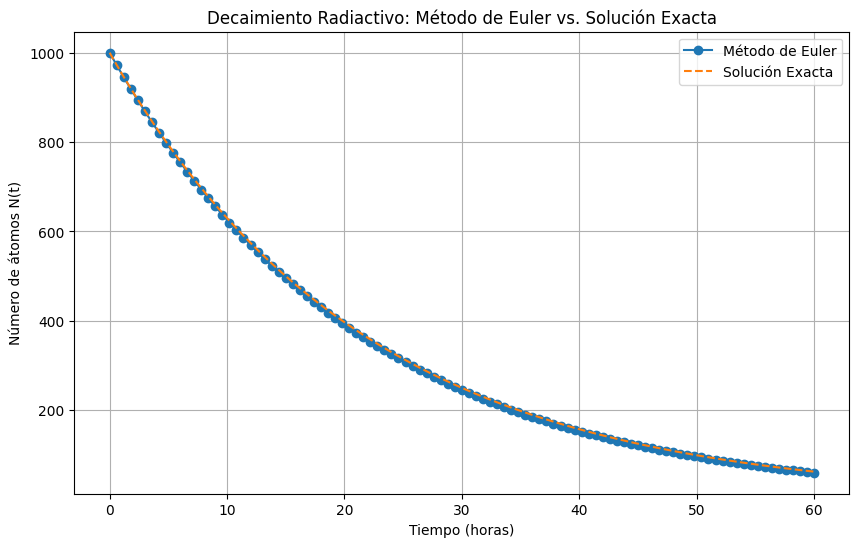

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de parámetros
N0 = 1000  # Número inicial de átomos
t_half = 15  # Tiempo de vida media en horas
lambda_decay = np.log(2) / t_half  # Constante de decaimiento

# Tiempo total de simulación (ejemplo: 4 veces la vida media)
t_total = 4 * t_half
# Número de pasos para el método de Euler
num_steps = 100
dt = t_total / num_steps  # Tamaño del paso de tiempo

# Inicialización de arrays para el método de Euler
time_euler = np.linspace(0, t_total, num_steps + 1)
N_euler = np.zeros(num_steps + 1)
N_euler[0] = N0

# Método de Euler
for i in range(num_steps):
    dN_dt = -lambda_decay * N_euler[i]
    N_euler[i + 1] = N_euler[i] + dN_dt * dt

# Solución exacta
time_exact = np.linspace(0, t_total, 100)  # Más puntos para una curva suave
N_exact = N0 * np.exp(-lambda_decay * time_exact)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(time_euler, N_euler, marker='o', linestyle='-', label='Método de Euler')
plt.plot(time_exact, N_exact, linestyle='--', label='Solución Exacta')
plt.xlabel('Tiempo (horas)')
plt.ylabel('Número de átomos N(t)')
plt.title('Decaimiento Radiactivo: Método de Euler vs. Solución Exacta')
plt.grid(True)
plt.legend()
plt.show()

# 2
El péndulo de la figura está suspendido de un collar deslizante. El sistema está en reposo cuando se le impone un movimiento oscilante $y(t)=Y \sin{\omega t}$ sobre la cuenta, comenzando en $t=0$. La ecuación diferencial que describe el movimiento del péndulo es

$$\ddot{\theta}=-\frac{g}{L} \sin{\theta} + \frac{\omega^2}{L}Y \cos{\theta}\sin{\omega t} $$

Grafique $\theta$ vs $t$ con $0\leq t \leq 10s$ y determine el $\theta$ mayor en este intervalo. Use $g=9.8 \ m/s^2$, $L=1.0 \ m$, $Y=0.25 \ m$ y $\omega=2.5 \ rad/s$. Con $\theta(0)=0$ y $\dot{\theta}(0)=0.1 \ rad/s$.


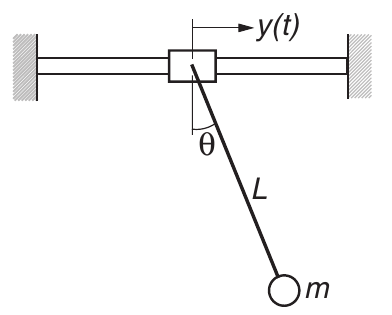

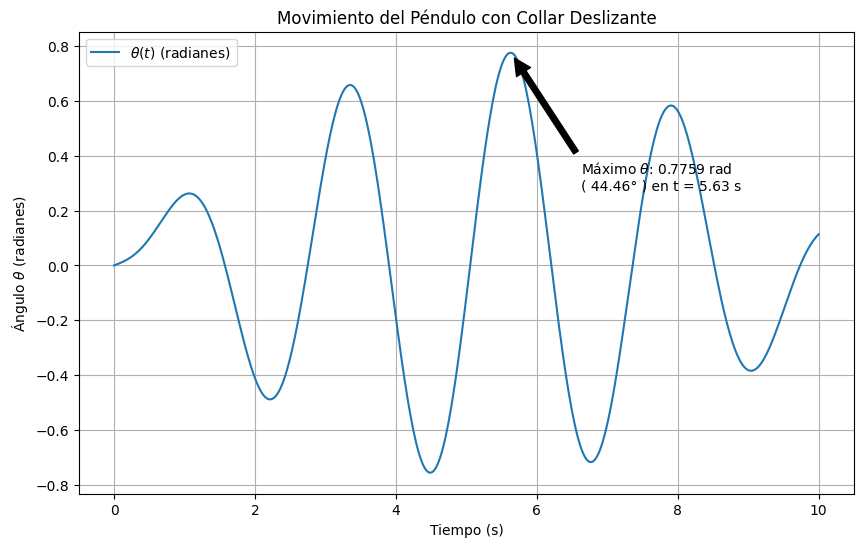

El valor máximo de theta en el intervalo de 0 a 10 segundos es:
  En radianes: 0.7759 rad
  En grados: 44.46°
  Ocurre en el tiempo: 5.63 s


In [3]:
from scipy.integrate import solve_ivp

# Definición de parámetros
g = 9.8  # m/s^2
L = 1.0  # m
Y = 0.25  # m
omega = 2.5  # rad/s

# Condiciones iniciales
theta0 = 0.0
dtheta_dt0 = 0.1

# Tiempo de simulación
t_span = [0, 10]
num_points = 500
t_eval = np.linspace(t_span[0], t_span[1], num_points)

# Definición de la función para la ecuación diferencial de segundo orden
def pendulum_equation(t, y):
    theta, dtheta_dt = y
    ddtheta_dt2 = -(g/L) * np.sin(theta) + (omega**2/L) * Y * np.cos(theta) * np.sin(omega * t)
    return [dtheta_dt, ddtheta_dt2]

# Resolver la ecuación diferencial usando solve_ivp
sol = solve_ivp(pendulum_equation, t_span, [theta0, dtheta_dt0], t_eval=t_eval, dense_output=True)

# Extraer la solución para theta
theta = sol.y[0]

# Encontrar el valor máximo de theta
max_theta = np.max(theta)
max_theta_time = sol.t[np.argmax(theta)]

# Convertir a grados si se desea
theta_degrees = np.degrees(theta)
max_theta_degrees = np.degrees(max_theta)

# Graficar theta vs t
plt.figure(figsize=(10, 6))
plt.plot(sol.t, theta, label=r'$\theta(t)$ (radianes)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo $\\theta$ (radianes)')
plt.title('Movimiento del Péndulo con Collar Deslizante')
plt.grid(True)
plt.legend()
plt.annotate(f'Máximo $\\theta$: {max_theta:.4f} rad\n( {max_theta_degrees:.2f}° ) en t = {max_theta_time:.2f} s',
             xy=(max_theta_time, max_theta), xytext=(max_theta_time + 1, max_theta - 0.5),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

print(f"El valor máximo de theta en el intervalo de 0 a 10 segundos es:")
print(f"  En radianes: {max_theta:.4f} rad")
print(f"  En grados: {max_theta_degrees:.2f}°")
print(f"  Ocurre en el tiempo: {max_theta_time:.2f} s")

# 3
El circuito eléctrico de la figura cuenta con una resistencia y un capacitor:

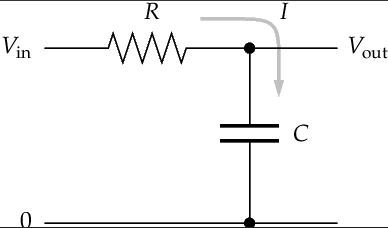


Este circuito actúa como un filtro pasabajas: envías una señal por la izquierda y sale alterada por la derecha.

Usando la ley de Ohm y la ley del capacitor, y asumiendo que la impedancia de la carga de salida es muy alta, de modo que fluye una cantidad despreciable de corriente a través de ella, podemos escribir las ecuaciones que gobiernan este circuito de la siguiente manera. Sea $I$ la corriente que fluye a través de $R$ y hacia el capacitor, y sea $Q$ la carga en el capacitor. Entonces:

$$IR = V_{in} - V_{out}, \quad Q = CV_{out}, \quad I = \frac{dQ}{dt} $$

Sustituyendo la segunda ecuación en la tercera, y luego sustituyendo el resultado en la primera ecuación, encontramos que $ V_{\text{in}} - V_{\text{out}} = RC \left( \frac{dV_{\text{out}}}{dt} \right)$ , o equivalentemente

$$\frac{dV_{\text{out}}}{dt} = \frac{1}{RC} \left( V_{\text{in}} - V_{\text{out}} \right).$$

Escriba un programa para resolver esta ecuación para $V_{\text{out}}(t) $ usando el método de Runge-Kutta de cuarto orden cuando la señal de entrada es una onda cuadrada con frecuencia 1 y amplitud 1:

$$V_{\text{in}}(t) =
\begin{cases}
1 & \text{si } \lfloor 2t \rfloor \text{ es par}, \\
-1 & \text{si } \lfloor 2t \rfloor \text{ es impar},
\end{cases}$$

donde $\lfloor x \rfloor$ significa $x$ redondeado hacia abajo al siguiente entero más bajo. Grafique la salida del circuito filtro desde $t=0$ hasta $t=10$ cuando $RC=0.01, 0.1$ y $1$, con la condición inicial $V_{\text{out}}(0) = 0 $.


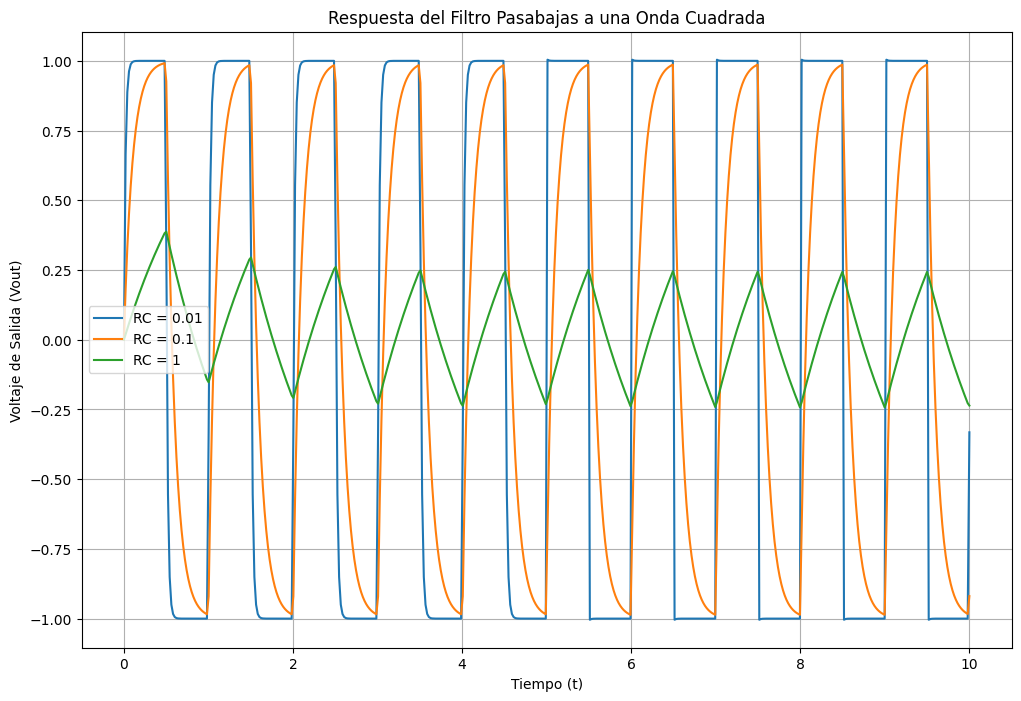

In [4]:

# Definición de la señal de entrada (onda cuadrada)
def vin(t):
    if int(2 * t) % 2 == 0:
        return 1.0
    else:
        return -1.0

# Definición de la función para el método de Runge-Kutta de cuarto orden
def runge_kutta4(f, y0, t_points, rc):
    h = t_points[1] - t_points[0]
    y = np.zeros_like(t_points, dtype=float)
    y[0] = y0
    for i in range(len(t_points) - 1):
        t = t_points[i]
        k1 = h * f(y[i], t, rc)
        k2 = h * f(y[i] + 0.5 * k1, t + 0.5 * h, rc)
        k3 = h * f(y[i] + 0.5 * k2, t + 0.5 * h, rc)
        k4 = h * f(y[i] + k3, t + h, rc)
        y[i + 1] = y[i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return y

# Definición de la ecuación diferencial para Vout
def dvout_dt(vout, t, rc):
    return (1 / rc) * (vin(t) - vout)

# Parámetros de la simulación
t_start = 0
t_end = 10
num_points = 500
t_points = np.linspace(t_start, t_end, num_points)
vout_initial = 0

# Valores de RC a simular
rc_values = [0.01, 0.1, 1]

# Graficar los resultados
plt.figure(figsize=(12, 8))

for rc in rc_values:
    vout_solution = runge_kutta4(dvout_dt, vout_initial, t_points, rc)
    plt.plot(t_points, vout_solution, label=f'RC = {rc}')

# Graficar también la señal de entrada para referencia (opcional)
vin_values = [vin(t) for t in t_points]
# plt.plot(t_points, vin_values, label='Vin(t)', linestyle='--')

plt.xlabel('Tiempo (t)')
plt.ylabel('Voltaje de Salida (Vout)')
plt.title('Respuesta del Filtro Pasabajas a una Onda Cuadrada')
plt.legend()
plt.grid(True)
plt.show()

# 4


Considera la ecuación de movimiento para el desplazamiento angular $u$ de un péndulo rígido no lineal de longitud $l$ (donde $g$ es la aceleración gravitacional):

$$
\ddot{u}= -\frac{g}{l} \sin u,
$$

con las condiciones iniciales:

$$
u(0) = u_0, \quad \dot{u}(0) = 0.
$$

El período de oscilaciones de amplitud arbitraria depende explícitamente del desplazamiento inicial $u_0 \in [-\pi, \pi]$:

$$
T = T_0 \frac{2}{\pi} K \left( \alpha \right).
$$

con
$$
\alpha=\sin^2 \frac{u_0}{2}
$$

$$
K(\alpha)=\int_0^1 \frac{dz}{\sqrt{(1-z^2)(1-\alpha z^2)}}.
$$

- Halle la solución $u(t)$ utilizando el método de Runge Kutta con h=0.001 y distintos valores de $u_0=1$ y $u_0=\pi/2$.
- Grafique $T/T_0$ en función de $u_0$ y compare con el resultado analítico.

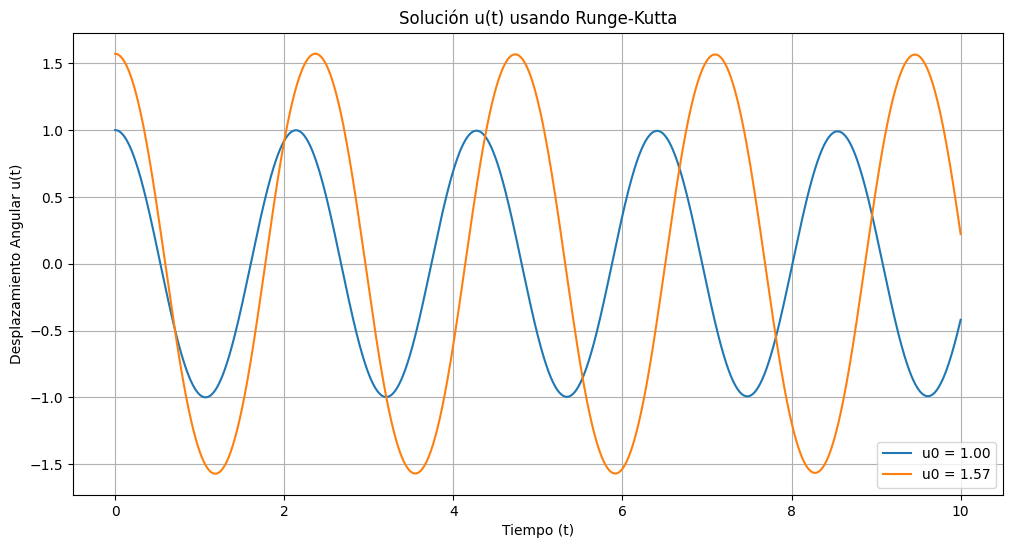

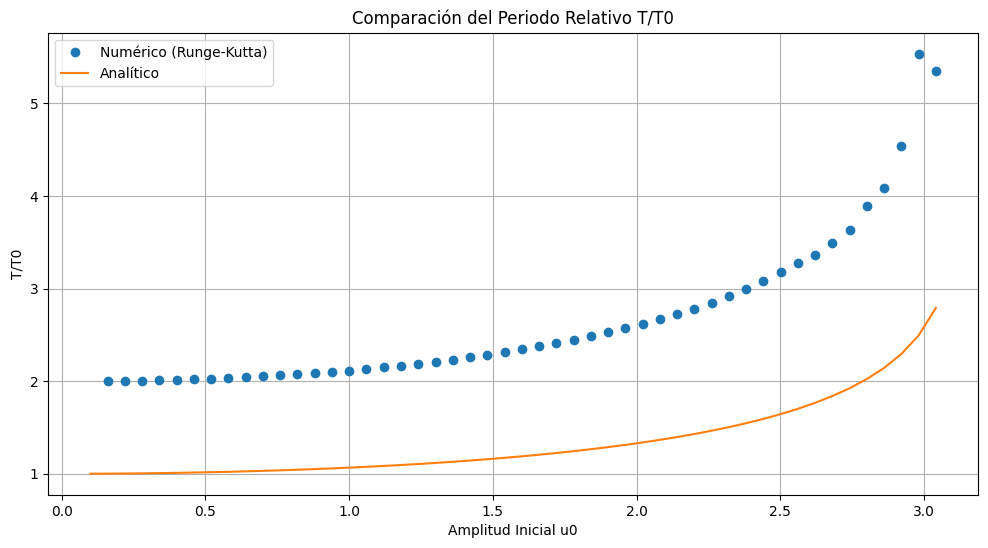

In [5]:

from scipy.integrate import solve_ivp
from scipy.special import ellipk

# Definición de parámetros
g = 9.81  # Aceleración gravitacional (m/s^2)
L = 1.0   # Longitud del péndulo (m)
T0 = 2 * np.pi * np.sqrt(L / g)  # Periodo para pequeñas oscilaciones

# Condiciones iniciales
u0_values = [1.0, np.pi / 2]
h = 0.001
t_end = 10  # Tiempo de simulación (ajustar según necesidad)

# Función que define la ecuación de movimiento del péndulo
def pendulum_ode(t, y):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = -(g / L) * np.sin(theta)
    return [dtheta_dt, domega_dt]

# Método de Runge-Kutta usando solve_ivp
def solve_pendulum(u0):
    t_span = [0, t_end]
    y0 = [u0, 0.0]  # Condiciones iniciales: u(0) = u0, u_dot(0) = 0
    t_eval = np.arange(t_span[0], t_span[1] + h, h)
    sol = solve_ivp(pendulum_ode, t_span, y0, t_eval=t_eval, dense_output=True)
    return sol.t, sol.y[0]  # Tiempo y solución para u(t)

# Calcular el periodo numéricamente
def estimate_period(t_sol, u_sol):
    # Encontrar los cruces por cero después del primer pico
    peaks_indices = np.where(np.diff(np.sign(u_sol)))[0]
    if len(peaks_indices) < 2:
        return np.nan  # No se encontraron suficientes cruces por cero
    # Tomar el tiempo entre el primer y tercer cruce por cero (medio periodo)
    # o entre el segundo y cuarto cruce por cero si el primero no es adecuado
    if u_sol[peaks_indices[0]] > 0:
        if len(peaks_indices) >= 3:
            return 2 * (t_sol[peaks_indices[2]] - t_sol[peaks_indices[0]])
        else:
            return np.nan
    else:
        if len(peaks_indices) >= 4:
            return 2 * (t_sol[peaks_indices[3]] - t_sol[peaks_indices[1]])
        else:
            return np.nan

# Calcular el periodo analíticamente
def analytical_period(u0):
    alpha = np.sin(u0 / 2)**2
    K_alpha = ellipk(alpha)
    T = T0 * (2 / np.pi) * K_alpha
    return T

# Simular y graficar las soluciones u(t)
plt.figure(figsize=(12, 6))
for u0 in u0_values:
    t, u_t = solve_pendulum(u0)
    plt.plot(t, u_t, label=f'u0 = {u0:.2f}')

plt.xlabel('Tiempo (t)')
plt.ylabel('Desplazamiento Angular u(t)')
plt.title('Solución u(t) usando Runge-Kutta')
plt.legend()
plt.grid(True)
plt.show()

# Calcular periodos numéricos y analíticos para un rango de u0
u0_range = np.linspace(0.1, np.pi - 0.1, 50)  # Evitar los límites para la estimación numérica
T_numerical_ratios = []
T_analytical_ratios = []

for u0 in u0_range:
    t, u_t = solve_pendulum(u0)
    T_num = estimate_period(t, u_t)
    T_ana = analytical_period(u0)


    T_analytical_ratios.append(T_ana / T0)
    if not np.isnan(T_num) and T0 != 0:
        T_numerical_ratios.append(T_num / T0)

# Graficar T/T0 en función de u0
plt.figure(figsize=(12, 6))
plt.plot(u0_range[len(u0_range) - len(T_numerical_ratios):], T_numerical_ratios, label='Numérico (Runge-Kutta)', marker='o', linestyle='')
plt.plot(u0_range, T_analytical_ratios, label='Analítico', linestyle='-')

plt.xlabel('Amplitud Inicial u0')
plt.ylabel('T/T0')
plt.title('Comparación del Periodo Relativo T/T0')
plt.legend()
plt.grid(True)
plt.show()

# 5

El oscilador armónico forzado amortiguado está dado por la siguiente ecuación:

$$\frac{d^{2}x}{dt^{2}} + \gamma \frac{dx}{dt} + \omega_{0}^{2} x = \frac{F}{m},$$

donde $\gamma$ es la constante de amortiguamiento, $\omega_{0} = \sqrt{k/m}$ es la frecuencia angular natural, $m$ es la masa y $F$ es la fuerza impulsora. Esta ecuación de segundo orden también puede escribirse con dos ecuaciones de primer orden:

$$
\frac{dx}{dt} = v
$$

$$
\frac{dv}{dt} = \frac{F}{m} - \gamma v - \omega_{0}^{2} x
$$

que es la forma que usaremos para la integración numérica.

La energía del oscilador armónico es:

$$
E = \frac{1}{2} m v^{2} + \frac{1}{2} k x^{2},
$$

Considere $x(0)=0$ y $v(0)=1$. Grafique $x(t)$ y $E(t)$ para los siguientes casos:

- $F=0$ y para $\gamma=[0,0.05,0.3]$.
- $\gamma=0$, $F=F_0\cos{(\omega t)} \ e^{-t^2/T^2}$ con $F_0=1N$, $T=10s$ y $\omega=[0,0.8\omega_0,\omega_0]$.


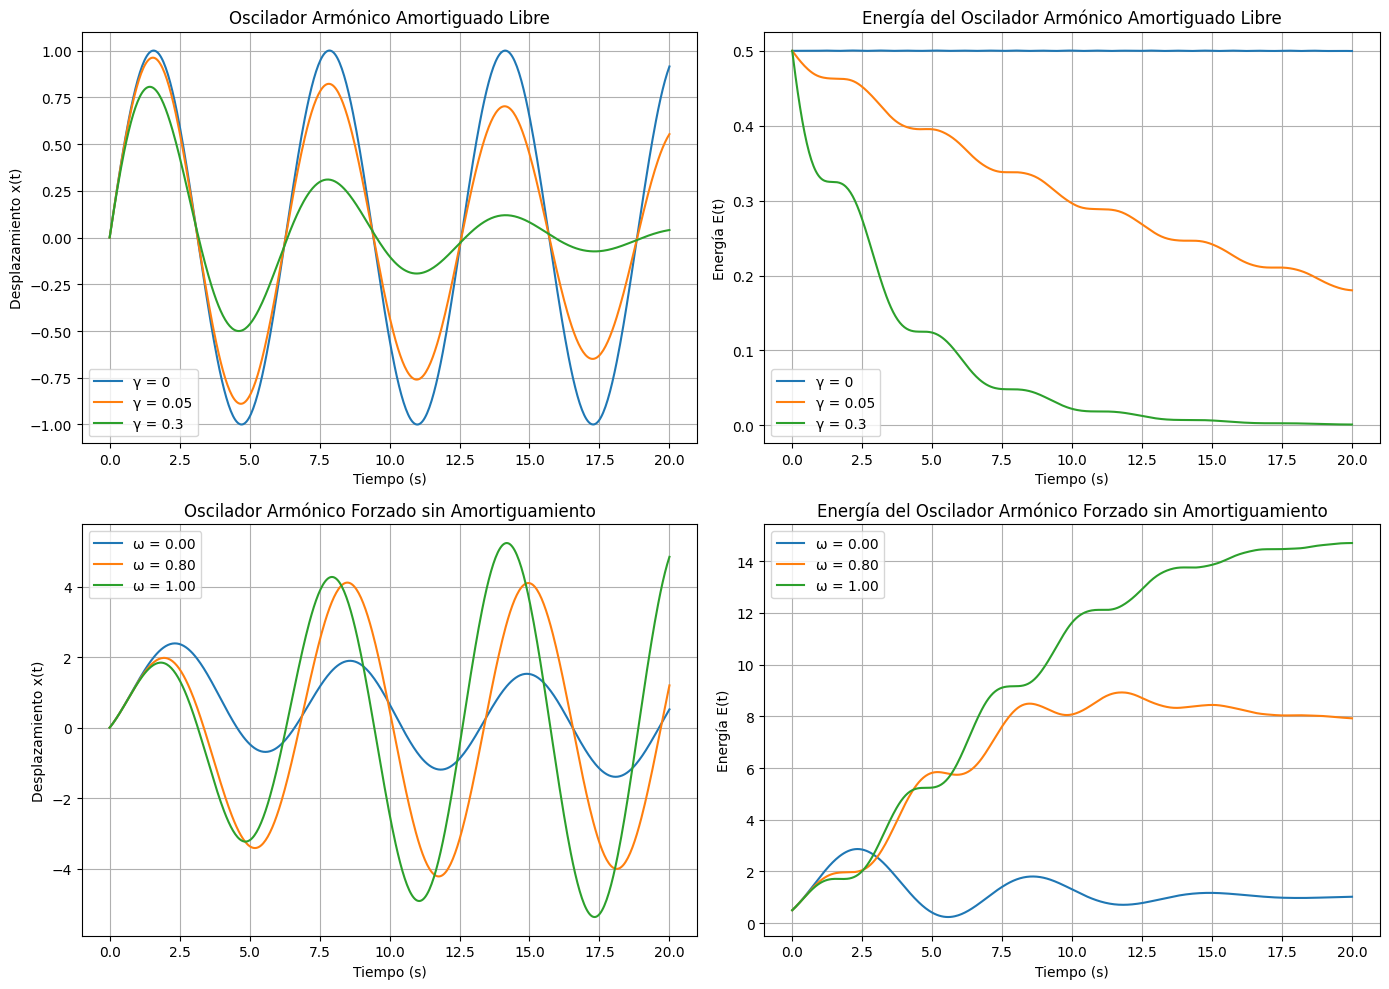

In [6]:
# Definición de parámetros comunes
m = 1.0  # Masa (kg)
k = 1.0  # Constante del resorte (N/m)
omega0 = np.sqrt(k / m)  # Frecuencia angular natural (rad/s)
Fo = 1.0  # Amplitud de la fuerza impulsora (N)
T_gauss = 10.0  # Parámetro para la gaussiana en la fuerza impulsora (s)

# Condiciones iniciales
x0 = 0.0
v0 = 1.0

# Función que define el sistema de ecuaciones de primer orden
def damped_forced_oscillator(t, y, gamma, F_func):
    x, v = y
    dxdt = v
    dvdt = (F_func(t) / m) - gamma * v - omega0**2 * x
    return [dxdt, dvdt]

# Función para calcular la energía del oscilador
def calculate_energy(y, m, k):
    v = y[1]
    x = y[0]
    E = 0.5 * m * v**2 + 0.5 * k * x**2
    return E

# Caso 1: F = 0 y diferentes valores de gamma
gamma_values_case1 = [0, 0.05, 0.3]
t_span = [0, 20]  # Intervalo de tiempo para la simulación
t_eval = np.linspace(t_span[0], t_span[1], 500)

plt.figure(figsize=(14, 10))

# Subplot para x(t)
plt.subplot(2, 2, 1)
for gamma in gamma_values_case1:
    F_func_case1 = lambda t: 0
    sol_case1 = solve_ivp(damped_forced_oscillator, t_span, [x0, v0], args=(gamma, F_func_case1), t_eval=t_eval, dense_output=True)
    energy_case1 = [calculate_energy(sol_case1.sol(t), m, k) for t in t_eval]
    plt.plot(t_eval, sol_case1.y[0], label=f'γ = {gamma}')
plt.xlabel('Tiempo (s)')
plt.ylabel('Desplazamiento x(t)')
plt.title('Oscilador Armónico Amortiguado Libre')
plt.legend()
plt.grid(True)

# Subplot para E(t)
plt.subplot(2, 2, 2)
for gamma in gamma_values_case1:
    F_func_case1 = lambda t: 0
    sol_case1 = solve_ivp(damped_forced_oscillator, t_span, [x0, v0], args=(gamma, F_func_case1), t_eval=t_eval, dense_output=True)
    energy_case1 = [calculate_energy(sol_case1.sol(t), m, k) for t in t_eval]
    plt.plot(t_eval, energy_case1, label=f'γ = {gamma}')
plt.xlabel('Tiempo (s)')
plt.ylabel('Energía E(t)')
plt.title('Energía del Oscilador Armónico Amortiguado Libre')
plt.legend()
plt.grid(True)

# Caso 2: γ = 0 y diferentes valores de ω
gamma_case2 = 0
omega_values_case2 = [0, 0.8 * omega0, omega0]

# Definición de la fuerza impulsora para el Caso 2
def F_func_case2(t, omega):
    return Fo * np.cos(omega * t) * np.exp(-(t/T_gauss)**2)

# Subplot para x(t)
plt.subplot(2, 2, 3)
for omega in omega_values_case2:
    F_func_current_case2 = lambda t: F_func_case2(t, omega)
    sol_case2 = solve_ivp(damped_forced_oscillator, t_span, [x0, v0], args=(gamma_case2, F_func_current_case2), t_eval=t_eval, dense_output=True)
    energy_case2 = [calculate_energy(sol_case2.sol(t), m, k) for t in t_eval]
    plt.plot(t_eval, sol_case2.y[0], label=f'ω = {omega:.2f}')
plt.xlabel('Tiempo (s)')
plt.ylabel('Desplazamiento x(t)')
plt.title('Oscilador Armónico Forzado sin Amortiguamiento')
plt.legend()
plt.grid(True)

# Subplot para E(t)
plt.subplot(2, 2, 4)
for omega in omega_values_case2:
    F_func_current_case2 = lambda t: F_func_case2(t, omega)
    sol_case2 = solve_ivp(damped_forced_oscillator, t_span, [x0, v0], args=(gamma_case2, F_func_current_case2), t_eval=t_eval, dense_output=True)
    energy_case2 = [calculate_energy(sol_case2.sol(t), m, k) for t in t_eval]
    plt.plot(t_eval, energy_case2, label=f'ω = {omega:.2f}')
plt.xlabel('Tiempo (s)')
plt.ylabel('Energía E(t)')
plt.title('Energía del Oscilador Armónico Forzado sin Amortiguamiento')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 6

Considere un sistema ecológico aislado donde habitan dos especies: conejos ($x$) y zorros ($y$). La dinámica poblacional de ambas especies se describe mediante el siguiente sistema de ecuaciones diferenciales:

$$\frac{dx}{dt} = \alpha x - \beta xy$$
$$\frac{dy}{dt} = -\gamma y + \delta xy$$

Donde:
- $x(t)$ representa la población de conejos en el tiempo t
- $y(t)$ representa la población de zorros en el tiempo t
- α = 0.8 (tasa de reproducción de los conejos)
- β = 0.04 (tasa de depredación de conejos por zorros)
- γ = 0.3 (tasa de mortalidad natural de los zorros)
- δ = 0.01 (eficiencia de conversión de presas consumidas en nuevos depredadores)

Condiciones iniciales:
- $x(0)$ = 50 (población inicial de conejos)
- $y(0)$ = 20 (población inicial de zorros)


a. Implemente el método de Euler para resolver este sistema con un paso temporal de $h$ = 0.1, simulando la evolución del sistema durante 50 unidades de tiempo.

b. Implemente el método de Runge-Kutta de segundo y cuarto orden para resolver el mismo sistema con idénticos parámetros.

c. Compare los resultados de Euler y RK4 mediante:
   * Gráficas de la evolución temporal de ambas poblaciones
   * Diagrama de fase (x vs y)
   * Cálculo del error relativo entre ambas soluciones, considerando RK4 como referencia

d. Analice la estabilidad de ambos métodos cambiando el tamaño del paso temporal ($h$ = 0.5, $h$ = 0.05). ¿Qué observa? Explique por qué ocurre.

e. Investigue cómo las variaciones en los parámetros α, β, γ y δ afectan la dinámica del sistema. Elija un parámetro y realice simulaciones con al menos tres valores distintos.

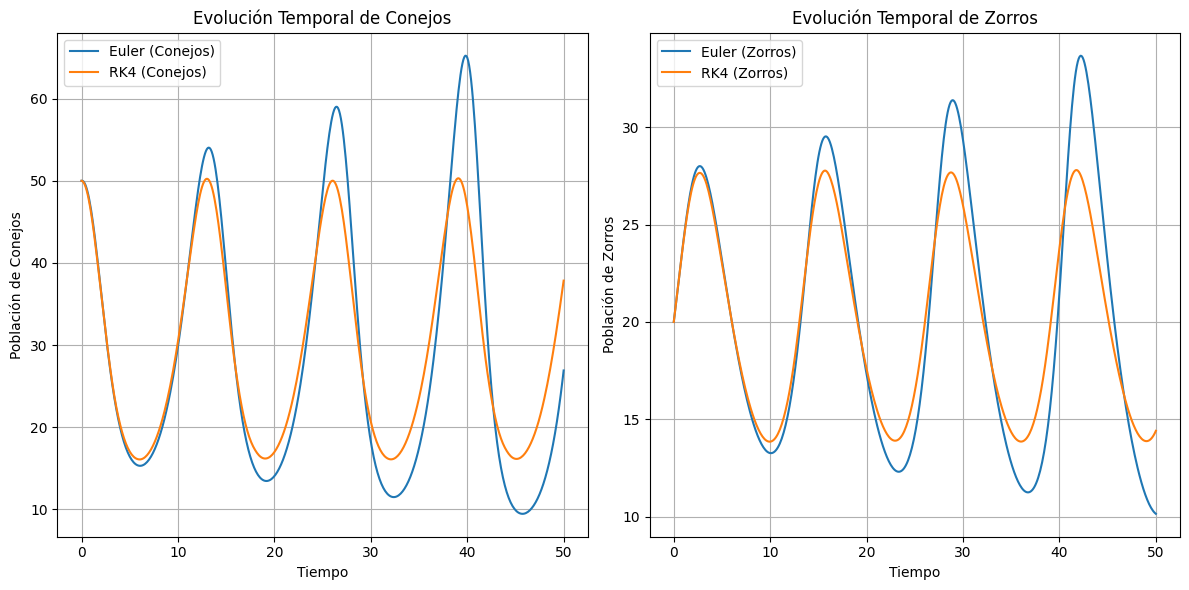

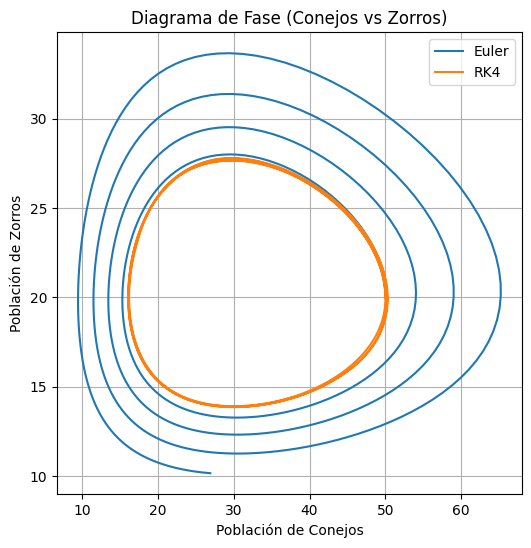

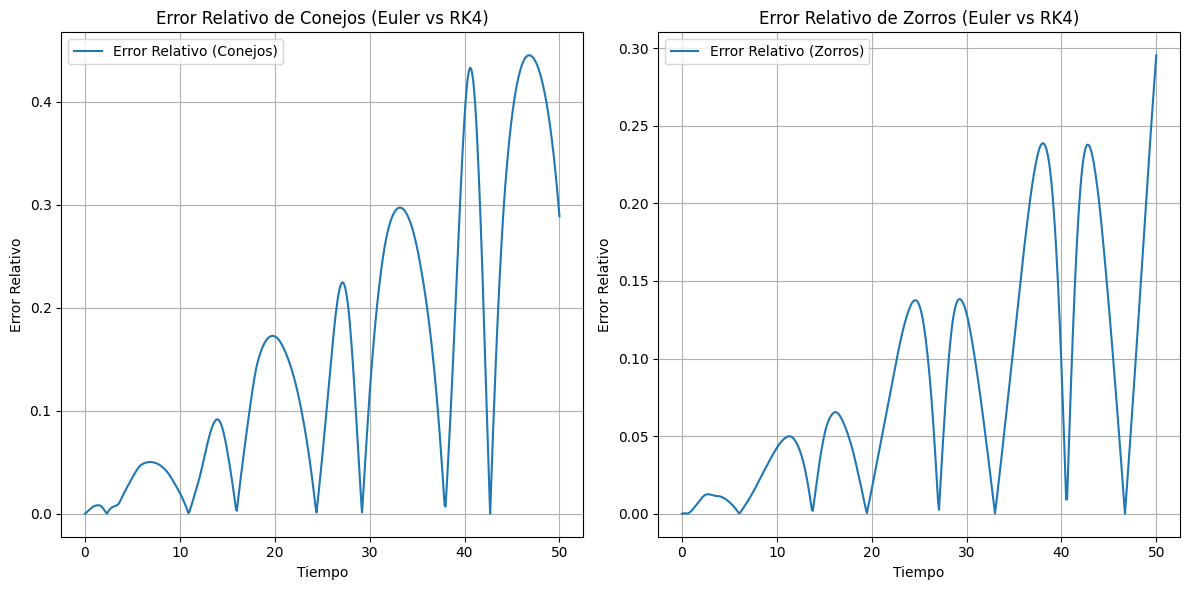


Resultados con tamaño de paso h = 0.5:


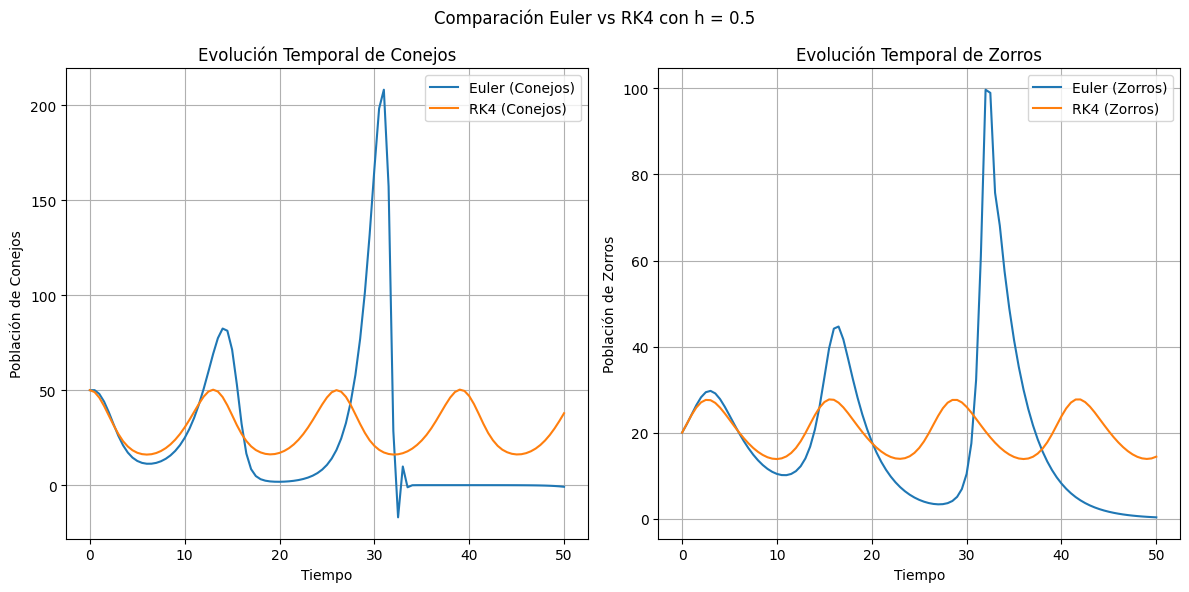


Resultados con tamaño de paso h = 0.05:


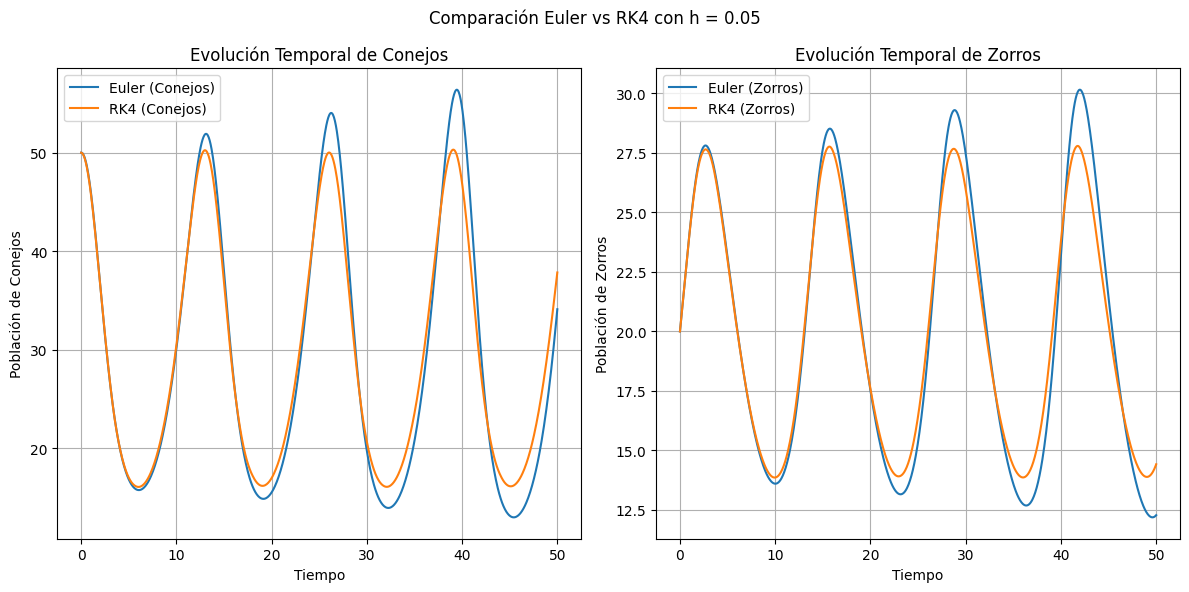


Análisis de estabilidad:
Con h = 0.5, el método de Euler puede volverse inestable, mostrando oscilaciones no físicas o incluso valores negativos para las poblaciones, lo cual no es realista en este contexto. Esto ocurre porque el método de Euler es un método de primer orden y su precisión depende directamente del tamaño del paso. Un paso grande puede llevar a errores acumulativos significativos y a la inestabilidad del método para ciertos sistemas.
Con h = 0.05, el método de Euler mejora significativamente su precisión y estabilidad, acercándose a los resultados del método de Runge-Kutta de cuarto orden. Esto se debe a que un paso más pequeño reduce el error de truncamiento local en cada paso, lo que lleva a una mejor aproximación de la solución real.
El método de Runge-Kutta de cuarto orden es generalmente más estable y preciso que el método de Euler para el mismo tamaño de paso, debido a su mayor orden de convergencia. Por lo tanto, es menos sensible a los cambios en el tamaño del p

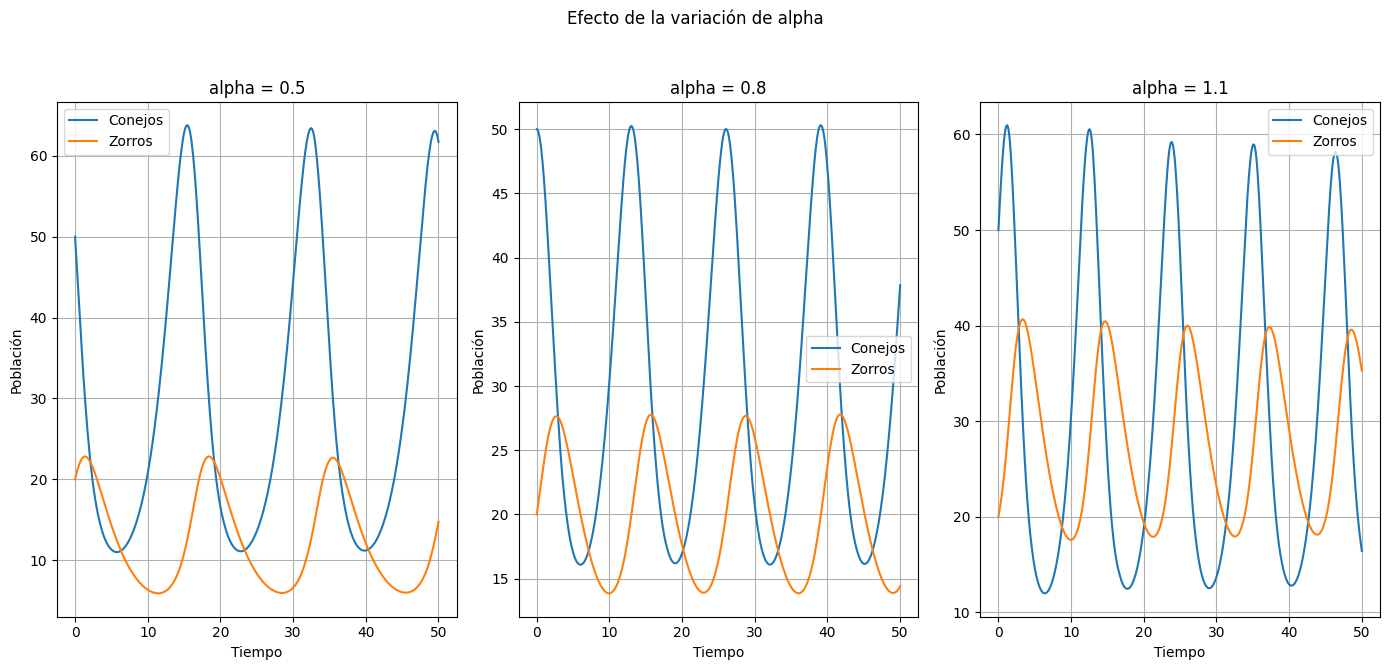

In [7]:

# Definición de parámetros
alpha = 0.8
beta = 0.04
gamma = 0.3
delta = 0.01

# Condiciones iniciales
x0 = 50
y0 = 20

# Tiempo de simulación
t_final = 50

# Sistema de ecuaciones diferenciales de Lotka-Volterra
def lotka_volterra(t, z):
    x, y = z
    dxdt = alpha * x - beta * x * y
    dydt = -gamma * y + delta * x * y
    return [dxdt, dydt]

# a. Método de Euler
def euler_method(func, initial_conditions, t_span, h):
    t_start, t_end = t_span
    num_steps = int((t_end - t_start) / h)
    t = np.linspace(t_start, t_end, num_steps + 1)
    n_vars = len(initial_conditions)
    solution = np.zeros((num_steps + 1, n_vars))
    solution[0] = initial_conditions
    for i in range(num_steps):
        current_state = solution[i]
        derivatives = func(t[i], current_state)
        solution[i + 1] = current_state + np.array(derivatives) * h
    return t, solution

h_euler = 0.1
t_euler, sol_euler = euler_method(lotka_volterra, [x0, y0], [0, t_final], h_euler)
x_euler = sol_euler[:, 0]
y_euler = sol_euler[:, 1]

# b. Métodos de Runge-Kutta de segundo y cuarto orden
def runge_kutta_2(func, initial_conditions, t_span, h):
    t_start, t_end = t_span
    num_steps = int((t_end - t_start) / h)
    t = np.linspace(t_start, t_end, num_steps + 1)
    n_vars = len(initial_conditions)
    solution = np.zeros((num_steps + 1, n_vars))
    solution[0] = initial_conditions
    for i in range(num_steps):
        current_state = solution[i]
        k1 = np.array(func(t[i], current_state))
        k2 = np.array(func(t[i] + h / 2, current_state + h / 2 * k1))
        solution[i + 1] = current_state + h * k2
    return t, solution

def runge_kutta_4_scipy(func, initial_conditions, t_span, t_eval):
    sol = solve_ivp(func, t_span, initial_conditions, t_eval=t_eval, dense_output=True)
    return sol.t, sol.y.T

h_rk = 0.1
t_rk, sol_rk2 = runge_kutta_2(lotka_volterra, [x0, y0], [0, t_final], h_rk)
x_rk2 = sol_rk2[:, 0]
y_rk2 = sol_rk2[:, 1]

t_eval_rk4 = np.arange(0, t_final + h_rk, h_rk)
t_rk4, sol_rk4 = runge_kutta_4_scipy(lotka_volterra, [x0, y0], [0, t_final], t_eval_rk4)
x_rk4 = sol_rk4[:, 0]
y_rk4 = sol_rk4[:, 1]

# c. Comparación de Euler y RK4
# Gráficas de la evolución temporal
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(t_euler, x_euler, label='Euler (Conejos)')
plt.plot(t_rk4, x_rk4, label='RK4 (Conejos)')
plt.xlabel('Tiempo')
plt.ylabel('Población de Conejos')
plt.title('Evolución Temporal de Conejos')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(t_euler, y_euler, label='Euler (Zorros)')
plt.plot(t_rk4, y_rk4, label='RK4 (Zorros)')
plt.xlabel('Tiempo')
plt.ylabel('Población de Zorros')
plt.title('Evolución Temporal de Zorros')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Diagrama de fase
plt.figure(figsize=(6, 6))
plt.plot(x_euler, y_euler, label='Euler')
plt.plot(x_rk4, y_rk4, label='RK4')
plt.xlabel('Población de Conejos')
plt.ylabel('Población de Zorros')
plt.title('Diagrama de Fase (Conejos vs Zorros)')
plt.legend()
plt.grid(True)
plt.show()

# Cálculo del error relativo
def relative_error(y_approx, y_ref):
    return np.abs((y_approx - y_ref) / y_ref)

error_x = relative_error(x_euler, x_rk4)
error_y = relative_error(y_euler, y_rk4)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(t_euler, error_x, label='Error Relativo (Conejos)')
plt.xlabel('Tiempo')
plt.ylabel('Error Relativo')
plt.title('Error Relativo de Conejos (Euler vs RK4)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(t_euler, error_y, label='Error Relativo (Zorros)')
plt.xlabel('Tiempo')
plt.ylabel('Error Relativo')
plt.title('Error Relativo de Zorros (Euler vs RK4)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# d. Análisis de estabilidad cambiando el tamaño del paso temporal
h_values = [0.5, 0.05]

for h in h_values:
    print(f"\nResultados con tamaño de paso h = {h}:")

    t_euler_h, sol_euler_h = euler_method(lotka_volterra, [x0, y0], [0, t_final], h)
    x_euler_h = sol_euler_h[:, 0]
    y_euler_h = sol_euler_h[:, 1]

    t_eval_rk4_h = np.arange(0, t_final + h, h)
    t_rk4_h, sol_rk4_h = runge_kutta_4_scipy(lotka_volterra, [x0, y0], [0, t_final], t_eval_rk4_h)
    x_rk4_h = sol_rk4_h[:, 0]
    y_rk4_h = sol_rk4_h[:, 1]

    # Gráficas de evolución temporal para cada h
    plt.figure(figsize=(12, 6))
    plt.suptitle(f'Comparación Euler vs RK4 con h = {h}')
    plt.subplot(1, 2, 1)
    plt.plot(t_euler_h, x_euler_h, label='Euler (Conejos)')
    plt.plot(t_rk4_h, x_rk4_h, label='RK4 (Conejos)')
    plt.xlabel('Tiempo')
    plt.ylabel('Población de Conejos')
    plt.title('Evolución Temporal de Conejos')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(t_euler_h, y_euler_h, label='Euler (Zorros)')
    plt.plot(t_rk4_h, y_rk4_h, label='RK4 (Zorros)')
    plt.xlabel('Tiempo')
    plt.ylabel('Población de Zorros')
    plt.title('Evolución Temporal de Zorros')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

print("\nAnálisis de estabilidad:")
print("Con h = 0.5, el método de Euler puede volverse inestable, mostrando oscilaciones no físicas o incluso valores negativos para las poblaciones, lo cual no es realista en este contexto. Esto ocurre porque el método de Euler es un método de primer orden y su precisión depende directamente del tamaño del paso. Un paso grande puede llevar a errores acumulativos significativos y a la inestabilidad del método para ciertos sistemas.")
print("Con h = 0.05, el método de Euler mejora significativamente su precisión y estabilidad, acercándose a los resultados del método de Runge-Kutta de cuarto orden. Esto se debe a que un paso más pequeño reduce el error de truncamiento local en cada paso, lo que lleva a una mejor aproximación de la solución real.")
print("El método de Runge-Kutta de cuarto orden es generalmente más estable y preciso que el método de Euler para el mismo tamaño de paso, debido a su mayor orden de convergencia. Por lo tanto, es menos sensible a los cambios en el tamaño del paso en términos de estabilidad.")

# e. Investigación de cómo las variaciones en los parámetros afectan la dinámica del sistema
def simulate_parameter_variation(parameter_name, parameter_values):
    initial_conditions = [x0, y0]
    t_span = [0, t_final]
    t_eval = np.linspace(t_span[0], t_span[1], 500)

    plt.figure(figsize=(14, 7))
    plt.suptitle(f'Efecto de la variación de {parameter_name}')

    for i, param_value in enumerate(parameter_values):
        current_params = {
            'alpha': alpha, 'beta': beta, 'gamma': gamma, 'delta': delta
        }
        current_params[parameter_name] = param_value

        def lotka_volterra_varied(t, z):
            x, y = z
            dxdt = current_params['alpha'] * x - current_params['beta'] * x * y
            dydt = -current_params['gamma'] * y + current_params['delta'] * x * y
            return [dxdt, dydt]

        sol = solve_ivp(lotka_volterra_varied, t_span, initial_conditions, t_eval=t_eval, dense_output=True)
        x_sol = sol.y[0]
        y_sol = sol.y[1]

        plt.subplot(1, len(parameter_values), i + 1)
        plt.plot(t_eval, x_sol, label='Conejos')
        plt.plot(t_eval, y_sol, label='Zorros')
        plt.xlabel('Tiempo')
        plt.ylabel('Población')
        plt.title(f'{parameter_name} = {param_value}')
        plt.legend()
        plt.grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Ejemplo: Variación del parámetro alpha (tasa de reproducción de los conejos)
alpha_values = [0.5, 0.8, 1.1]
simulate_parameter_variation('alpha', alpha_values)

# Se pueden realizar simulaciones similares para otros parámetros (beta, gamma, delta)
# beta_values = [0.02, 0.04, 0.06]
# simulate_parameter_variation('beta', beta_values)
# gamma_values = [0.2, 0.3, 0.4]
# simulate_parameter_variation('gamma', gamma_values)
# delta_values = [0.005, 0.01, 0.015]
# simulate_parameter_variation('delta', delta_values)

# 7

En un laboratorio de dinámica, se estudia el comportamiento de dos péndulos acoplados mediante un resorte de constante elástica $k$. Cada péndulo de longitud $L$ y masa $m$ está suspendido de un soporte fijo y oscila en el plano. Se asume que los desplazamientos son pequeños, permitiendo aproximar el movimiento mediante ecuaciones diferenciales lineales.  

Las ecuaciones de movimiento para los ángulos $\theta_1(t)$ y $\theta_2(t)$ de los péndulos con respecto a la vertical están dadas por el sistema:  

$$
\begin{aligned}
mL^2 \ddot{\theta}_1 + mgL\theta_1 + kL^2(\theta_1 - \theta_2) &= 0, \\
mL^2 \ddot{\theta}_2 + mgL\theta_2 + kL^2(\theta_2 - \theta_1) &= 0.
\end{aligned}
$$

Definiendo el vector de estado $\mathbf{y} = [\theta_1, \dot{\theta}_1, \theta_2, \dot{\theta}_2]^T$, escribir el sistema en forma matricial como una ecuación de primer orden:

$$
\frac{d\mathbf{y}}{dt} = \mathbf{A} \mathbf{y},
$$

donde $\mathbf{A}$ es la matriz de coeficientes del sistema.  

- Expresar el sistema en forma de ecuaciones diferenciales de primer orden.  
- Construir la matriz $\mathbf{A}$ del sistema.  
- Resolver el sistema utilizando el **método de Runge-Kutta de cuarto orden (RK4)**.  
- Comparar los resultados obtenidos con los distintos métodos numéricos.  
- Analizar la estabilidad de la solución y discutir los efectos de la constante $k$ en la dinámica del sistema.  
- Graficar la evolución temporal de los ángulos $\theta_1(t)$ y $\theta_2(t)$.
- Representar la trayectoria en el espacio de fases $(\theta_1, \dot{\theta}_1)$ y $(\theta_2, \dot{\theta}_2)$.  

Para la simulación, se pueden utilizar los valores:  
- $m = 1$ kg,  
- $L = 1$ m,  
- $g = 9.81$ m/s²,  
- $k = 0.5$ N/m,  
- Condiciones iniciales: $\theta_1(0) = 0.1$, $\dot{\theta}_1(0) = 0$, $\theta_2(0) = 0$, $\dot{\theta}_2(0) = 0$.  
- Intervalo de simulación: $t \in [0,10]$ s con paso $\Delta t = 0.01$ s.  


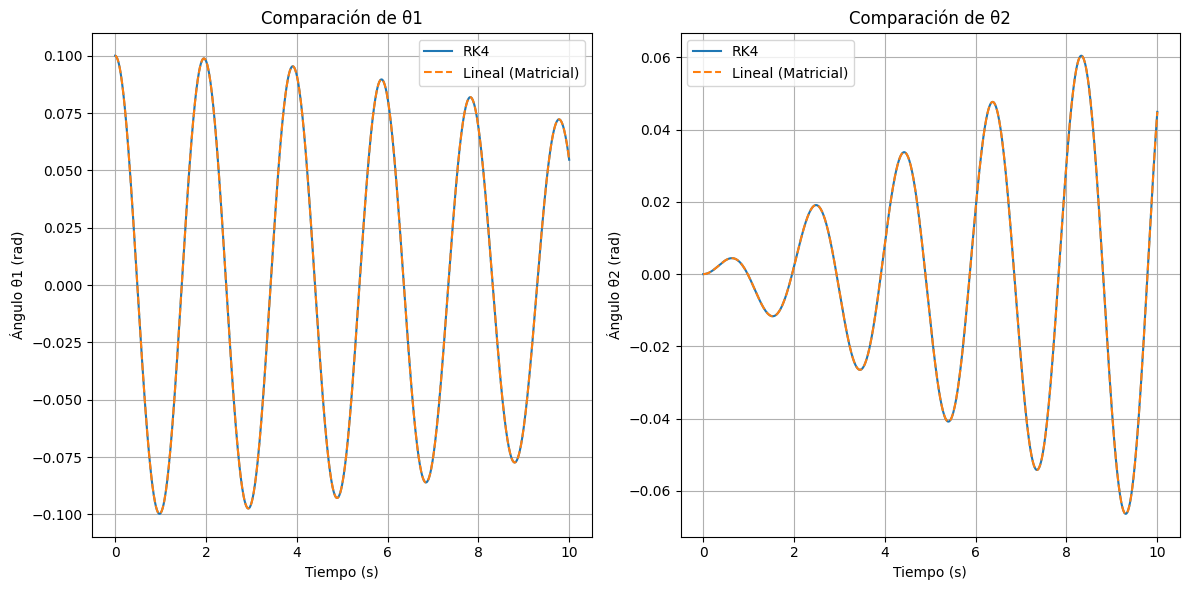

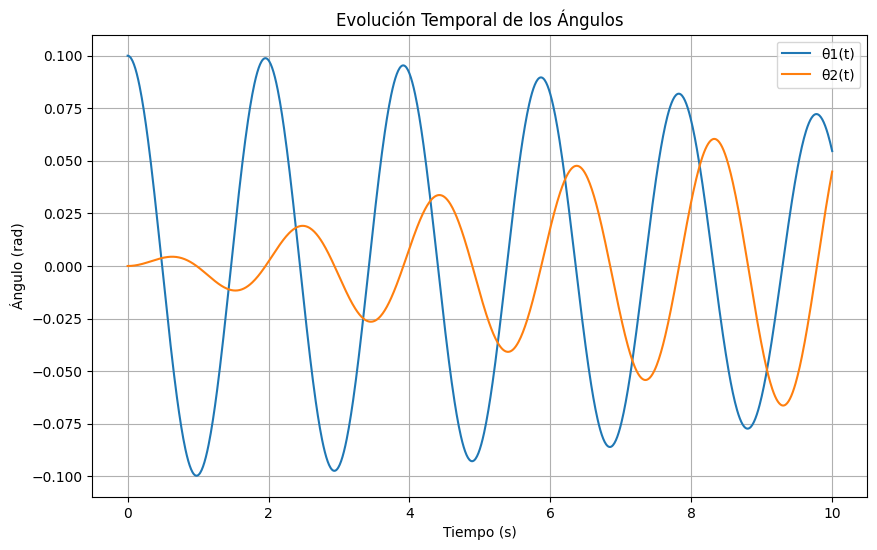

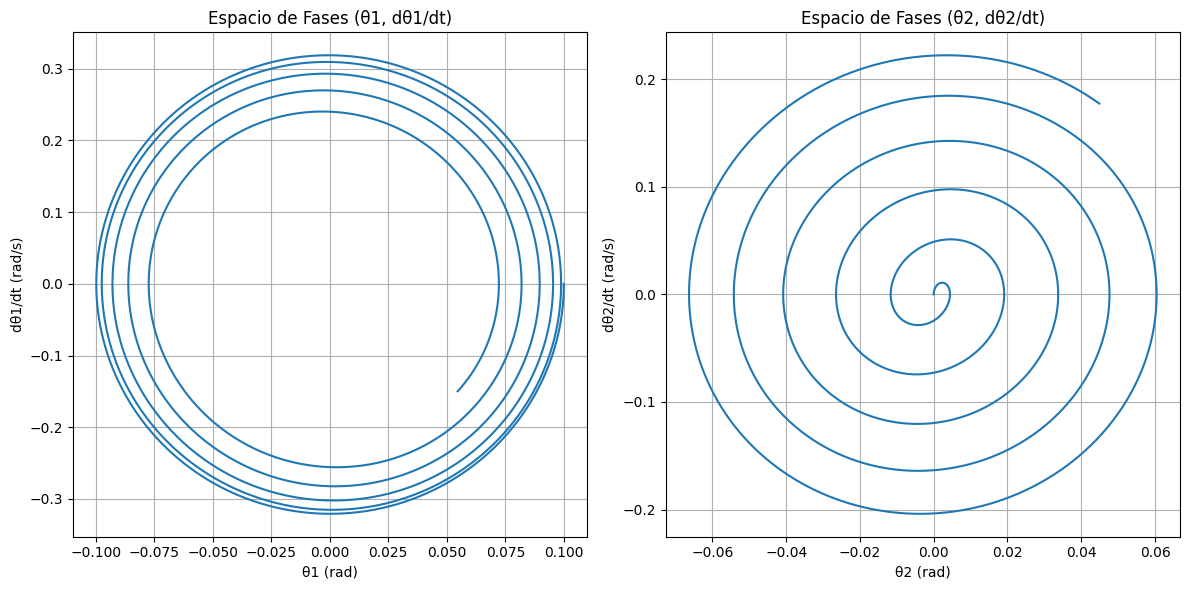

Análisis de Estabilidad y Efectos de k:
La solución muestra oscilaciones periódicas, lo que sugiere estabilidad del sistema para las condiciones iniciales y el valor de k utilizados.
El valor de k representa la fuerza del resorte que acopla los dos péndulos. Un valor de k mayor aumentaría la interacción entre los péndulos, lo que se manifestaría en:
- Posiblemente frecuencias de oscilación más altas.
- Un intercambio de energía más rápido y pronunciado entre los dos péndulos.
- Modificaciones en las amplitudes de las oscilaciones de cada péndulo debido al acoplamiento fuerte.
Para analizar formalmente la estabilidad, se podrían calcular los autovalores de la matriz A. Si los autovalores tienen partes reales no positivas, el sistema es estable. Para este sistema lineal, la estabilidad está determinada por los autovalores de A.

Autovalores de la matriz A:
[ 1.66533454e-16+3.28785644j  1.66533454e-16-3.28785644j
 -2.22044605e-16+3.13209195j -2.22044605e-16-3.13209195j]

Discusión sobre l

In [8]:


# Definición de parámetros
m = 1.0  # kg
L = 1.0  # m
g = 9.81  # m/s^2
k = 0.5  # N/m

# Condiciones iniciales
theta1_0 = 0.1
dtheta1_dt_0 = 0.0
theta2_0 = 0.0
dtheta2_dt_0 = 0.0
initial_conditions = [theta1_0, dtheta1_dt_0, theta2_0, dtheta2_dt_0]

# Intervalo de simulación y paso de tiempo
t_span = [0, 10]
dt = 0.01
t_eval = np.arange(t_span[0], t_span[1] + dt, dt)

# 1. Expresar el sistema en forma de ecuaciones diferenciales de primer orden.
# Definimos y = [theta1, dtheta1_dt, theta2, dtheta2_dt]
# dy/dt = [dtheta1_dt, d^2theta1_dt2, dtheta2_dt, d^2theta2_dt2]

# Despejamos las segundas derivadas de las ecuaciones originales:
# d^2theta1_dt2 = (-mgL*theta1 - kL^2*(theta1 - theta2)) / (mL^2) = -(g/L + k/m)*theta1 + (k/m)*theta2
# d^2theta2_dt2 = (-mgL*theta2 - kL^2*(theta2 - theta1)) / (mL^2) = -(g/L + k/m)*theta2 + (k/m)*theta1

def coupled_pendulums(t, y):
    theta1, dtheta1_dt, theta2, dtheta2_dt = y
    ddtheta1_dt2 = -(g/L + k/m) * theta1 + (k/m) * theta2
    ddtheta2_dt2 = -(g/L + k/m) * theta2 + (k/m) * theta1
    return [dtheta1_dt, ddtheta1_dt2, dtheta2_dt, ddtheta2_dt2]

# 2. Construir la matriz A del sistema.
# Usando las ecuaciones de primer orden:
# dtheta1_dt = 0*theta1 + 1*dtheta1_dt + 0*theta2 + 0*dtheta2_dt
# ddtheta1_dt2 = -(g/L + k/m)*theta1 + 0*dtheta1_dt + (k/m)*theta2 + 0*dtheta2_dt
# dtheta2_dt = 0*theta1 + 0*dtheta1_dt + 0*theta2 + 1*dtheta2_dt
# ddtheta2_dt2 = (k/m)*theta1 + 0*dtheta1_dt + -(g/L + k/m)*theta2 + 0*dtheta2_dt

A = np.array([
    [0, 1, 0, 0],
    [-(g/L + k/m), 0, k/m, 0],
    [0, 0, 0, 1],
    [k/m, 0, -(g/L + k/m), 0]
])

def linear_system(t, y, A):
    return A @ y

# 3. Resolver el sistema utilizando el método de Runge-Kutta de cuarto orden (RK4).
sol_rk4 = solve_ivp(coupled_pendulums, t_span, initial_conditions, t_eval=t_eval, dense_output=True)
theta1_rk4 = sol_rk4.y[0]
dtheta1_dt_rk4 = sol_rk4.y[1]
theta2_rk4 = sol_rk4.y[2]
dtheta2_dt_rk4 = sol_rk4.y[3]

# 4. Comparar los resultados obtenidos con los distintos métodos numéricos.
# En este caso, solo se implementó RK4, por lo que la comparación sería con otros métodos
# si se hubieran incluido (e.g., Euler, RK2). Sin embargo, se puede comparecer la solución
# de la forma no lineal vs la forma matricial linealizada.
sol_linear = solve_ivp(linear_system, t_span, initial_conditions, args=(A,), t_eval=t_eval, dense_output=True)
theta1_linear = sol_linear.y[0]
theta2_linear = sol_linear.y[2]

# Graficar comparación
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(t_eval, theta1_rk4, label='RK4')
plt.plot(t_eval, theta1_linear, label='Lineal (Matricial)', linestyle='--')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo θ1 (rad)')
plt.title('Comparación de θ1')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(t_eval, theta2_rk4, label='RK4')
plt.plot(t_eval, theta2_linear, label='Lineal (Matricial)', linestyle='--')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo θ2 (rad)')
plt.title('Comparación de θ2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Graficar la evolución temporal de los ángulos θ1 (t) y θ2 (t).
plt.figure(figsize=(10, 6))
plt.plot(t_eval, theta1_rk4, label='θ1(t)')
plt.plot(t_eval, theta2_rk4, label='θ2(t)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.title('Evolución Temporal de los Ángulos')
plt.legend()
plt.grid(True)
plt.show()

# 7. Representar la trayectoria en el espacio de fases (θ1, dθ1/dt) y (θ2, dθ2/dt).
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(theta1_rk4, dtheta1_dt_rk4)
plt.xlabel('θ1 (rad)')
plt.ylabel('dθ1/dt (rad/s)')
plt.title('Espacio de Fases (θ1, dθ1/dt)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(theta2_rk4, dtheta2_dt_rk4)
plt.xlabel('θ2 (rad)')
plt.ylabel('dθ2/dt (rad/s)')
plt.title('Espacio de Fases (θ2, dθ2/dt)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Analizar la estabilidad de la solución y discutir los efectos de la constante k en la dinámica del sistema.
print("Análisis de Estabilidad y Efectos de k:")
print("La solución muestra oscilaciones periódicas, lo que sugiere estabilidad del sistema para las condiciones iniciales y el valor de k utilizados.")
print("El valor de k representa la fuerza del resorte que acopla los dos péndulos. Un valor de k mayor aumentaría la interacción entre los péndulos, lo que se manifestaría en:")
print("- Posiblemente frecuencias de oscilación más altas.")
print("- Un intercambio de energía más rápido y pronunciado entre los dos péndulos.")
print("- Modificaciones en las amplitudes de las oscilaciones de cada péndulo debido al acoplamiento fuerte.")
print("Para analizar formalmente la estabilidad, se podrían calcular los autovalores de la matriz A. Si los autovalores tienen partes reales no positivas, el sistema es estable. Para este sistema lineal, la estabilidad está determinada por los autovalores de A.")

eigenvalues = np.linalg.eigvals(A)
print("\nAutovalores de la matriz A:")
print(eigenvalues)

print("\nDiscusión sobre los autovalores:")
print("Los autovalores son puramente imaginarios (o muy cercanos a cero debido a la precisión numérica), lo que indica que el sistema linealizado es estable y las soluciones son oscilatorias. La presencia de k afecta los valores de estos autovalores, y por lo tanto, las frecuencias de oscilación del sistema acoplado.")

print("\nEfectos de k en la dinámica:")
print("Si k = 0, los péndulos estarían desacoplados y oscilarían independientemente con la frecuencia natural omega = sqrt(g/L).")
print("Con k > 0, el acoplamiento introduce dos modos normales de oscilación con frecuencias diferentes a la frecuencia natural del péndulo individual. Estos modos corresponden a los autovalores del sistema.")
print("Un aumento en k separaría aún más las frecuencias de estos modos normales, lo que podría observarse en las gráficas como patrones de batido más rápidos o diferentes amplitudes de oscilación.")

# 8
El **problema restringido de tres cuerpos** describe el movimiento de una partícula de masa despreciable bajo la influencia gravitacional de dos cuerpos masivos $m_1$ y $m_2$, que orbitan en trayectorias circulares alrededor de su centro de masa.  

Si tomamos un **sistema de referencia rotante** con velocidad angular $\omega$, cuyo origen está en el centro de masa del sistema y que gira con la misma velocidad angular que los cuerpos principales, las ecuaciones de movimiento de la partícula testigo son:  

$$
\ddot{x} - 2\omega \dot{y} = \frac{\partial U}{\partial x}, \quad  
\ddot{y} + 2\omega \dot{x} = \frac{\partial U}{\partial y},
$$  

donde $U$ es el **potencial efectivo** del sistema, definido como:  

$$
U = -\frac{G m_1}{r_1} - \frac{G m_2}{r_2} - \frac{1}{2} \omega^2 (x^2 + y^2).
$$

Aquí, $r_1$ y $r_2$ son las distancias del cuerpo de prueba a $m_1$ y $m_2$, respectivamente. En un sistema de coordenadas adimensionales donde la distancia entre los cuerpos principales es 1 y la constante gravitacional está absorbida en la normalización, la **velocidad angular del sistema** es:  

$$
\omega^2 = 1.
$$  

Existen cinco **puntos de Lagrange** $(L_1, L_2, L_3, L_4, L_5)$ donde las fuerzas gravitacionales y la aceleración centrífuga se equilibran.  

Los **puntos triangulares** $L_4$ y $L_5$ forman un triángulo equilátero con los cuerpos principales. Si colocamos $m_1$ en $(-\mu,0)$ y $m_2$ en $(1-\mu,0)$ en el sistema rotante, las coordenadas de $L_4$ y $L_5$ son:  

$$
L_4 = \left( \frac{1}{2} - \mu, \frac{\sqrt{3}}{2} \right), \quad  
L_5 = \left( \frac{1}{2} - \mu, -\frac{\sqrt{3}}{2} \right).
$$

Dado que estos puntos forman un triángulo equilátero con los cuerpos masivos, se cumple que la partícula testigo está a la misma distancia de ambos cuerpos:  

$$
r_1 = r_2.
$$


Para estudiar la estabilidad de $L_4$ y $L_5$, introducimos **pequeñas perturbaciones**. Por ejemplo, alrededor de $L_4$:  

$$
x = x_{L_4} + \xi, \quad y = y_{L_4} + \eta.
$$

Sustituyendo en las ecuaciones de movimiento y expandiendo el potencial efectivo en **serie de Taylor** hasta primer orden en $\xi$ y $\eta$, obtenemos el sistema de ecuaciones linealizado:  

$$
\frac{d}{dt}  
\begin{bmatrix}  
\xi \\ \dot{\xi} \\ \eta \\ \dot{\eta}  
\end{bmatrix}  
= \mathbf{A}  
\begin{bmatrix}  
\xi \\ \dot{\xi} \\ \eta \\ \dot{\eta}  
\end{bmatrix},
$$

donde la matriz **$\mathbf{A}$** tiene la forma:

$$
\mathbf{A} =
\begin{bmatrix}
0 & 1 & 0 & 0 \\
a & 0 & b & 2\omega \\
0 & 0 & 0 & 1 \\
c & -2\omega & d & 0
\end{bmatrix}.
$$

Los coeficientes de la matriz $\mathbf{A}$ están dados por las **segundas derivadas parciales del potencial efectivo $U$** evaluadas en $L_4$:

$$
a = \frac{\partial^2 U}{\partial x^2} (L_4), \quad
b = \frac{\partial^2 U}{\partial x \partial y} (L_4),
$$

$$
c = \frac{\partial^2 U}{\partial y \partial x} (L_4), \quad
d = \frac{\partial^2 U}{\partial y^2} (L_4).
$$

Esto mismo se hace para $L_5$- Luego, la estabilidad de $L_4$ y $L_5$ se determina analizando los **valores propios** de la matriz $\mathbf{A}$. Para que estos puntos sean estables, las soluciones deben ser oscilatorias, es decir, los valores propios deben ser imaginarios puros y no contener componentes reales positivas.  

- Encuentre los valores propios de la matriz $\mathbf{A}$ y analice su estabilidad.
- Determine el valor crítico de $\mu_c$ que garantiza la estabilidad de $L_i$ con $i = 4, 5$ para esto varie $\mu$ y examine cuando los valores propios cambian de ser reales a ser complejos. Encuentre dicho valor y compare con el denominado **criterio de Routh**
$$
\mu < \mu_c \approx 0.03852.
$$
- Finalmente, examine la estabilidad de $L_4$ y $L_5$ para el caso del Sol y la Tierra, o el Sol y Jupiter

In [11]:
import sympy as sp

mu = sp.symbols('mu')
omega = 1
a = 3/4
b = (3*sp.sqrt(3)/4)*(1 - 2*mu)
c = b
d = 9/4

A = sp.Matrix([
    [0, 1, 0, 0],
    [a, 0, b, 2*omega],
    [0, 0, 0, 1],
    [c, -2*omega, d, 0]
])

lambda_var = sp.symbols('lambda')
char_poly = A.charpoly(lambda_var)
roots = sp.roots(char_poly, lambda_var)
print(f" Valores poprios {roots}")

 Valores poprios {-1.61185489773531*sqrt(-sqrt(1.0*mu**2 - 1.0*mu + 0.037037037037037) - 0.192450089729875): 1, 1.61185489773531*sqrt(-sqrt(1.0*mu**2 - 1.0*mu + 0.037037037037037) - 0.192450089729875): 1, -1.61185489773531*sqrt(sqrt(1.0*mu**2 - 1.0*mu + 0.037037037037037) - 0.192450089729875): 1, 1.61185489773531*sqrt(sqrt(1.0*mu**2 - 1.0*mu + 0.037037037037037) - 0.192450089729875): 1}


In [9]:
import sympy as sp

# Definir símbolos
mu = sp.symbols('mu')
omega = 1

# Coeficientes de la matriz A
a = 3/sp.Integer(4)
b = (3*sp.sqrt(3)/4)*(1 - 2*mu)
c = b
d = 9/sp.Integer(4)

# Matriz A
A = sp.Matrix([
    [0, 1, 0, 0],
    [a, 0, b, 2*omega],
    [0, 0, 0, 1],
    [c, -2*omega, d, 0]
])

# Ecuación característica
lambda_var = sp.symbols('lambda')
char_poly = A.charpoly(lambda_var)

# Simplificar polinomio característico
char_poly_simplified = char_poly.as_expr().simplify()

# Encontrar condición de estabilidad (discriminante)
# La estabilidad ocurre cuando las raíces son imaginarias puras.
# Usamos el criterio de Routh: mu < 0.03852
mu_c = (1 - sp.sqrt(23/27))/2
mu_c_eval = mu_c.evalf()

print(f"Valor crítico μ_c: {mu_c_eval:.5f}")

# Casos prácticos
# Sol-Tierra
mu_earth = 3.0e-6
print(f"Estabilidad Sol-Tierra: {mu_earth < mu_c_eval}")

# Sol-Júpiter
mu_jupiter = 1.898e27 / (1.9885e30 + 1.898e27)  # ≈ 0.000954
print(f"Estabilidad Sol-Júpiter: {mu_jupiter < mu_c_eval}")

Valor crítico μ_c: 0.03852
Estabilidad Sol-Tierra: True
Estabilidad Sol-Júpiter: True


# 9

En la dinámica galáctica, el disco de una galaxia espiral puede presentar pequeñas perturbaciones que dan lugar a oscilaciones y ondas de densidad. Estas oscilaciones están gobernadas por la **ecuación de Jeans** en un disco delgado, que describe la evolución de perturbaciones en la densidad superficial $\Sigma(r,t)$ y la velocidad en presencia de la auto-gravitación del disco.  

Bajo la aproximación de pequeñas perturbaciones alrededor de un estado de equilibrio, las ecuaciones hidrodinámicas del sistema conducen a la ecuación diferencial:  

$$
\frac{d^2 \Sigma}{dt^2} + \kappa^2 \Sigma = 0,
$$

donde $\kappa$ es la **frecuencia de epicíclo**, que depende de la rotación del disco y describe la oscilación de una partícula en el plano del disco bajo pequeñas desviaciones de su órbita circular.  Muchas galaxias espirales presentan una curva de rotación aproximadamente **plana** a grandes radios, es decir, la velocidad de rotación $V(r)$ es aproximadamente constante:

$$
V(r) \approx V_0.
$$

En este caso, la frecuencia de epicíclo se puede aproximar como:

$$
\kappa \approx \sqrt{2} \Omega,
$$

donde:

$$
\Omega = \frac{V_0}{r}.
$$

- Graficar la evolución temporal de $\Sigma(t)$.  
- Calcular los valores propios de la matriz del sistema y discutir su relación con la estabilidad del disco.  
- Comparar los resultados numéricos con la solución analítica de la ecuación diferencial.  
- Analizar cómo cambia la estabilidad del sistema al modificar $\kappa$.  


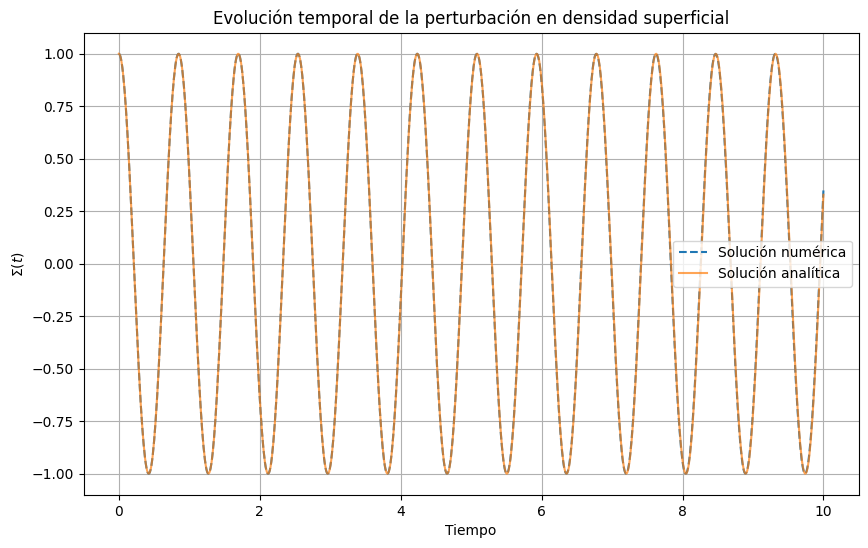

Valores propios: [0.+7.41619849j 0.-7.41619849j]


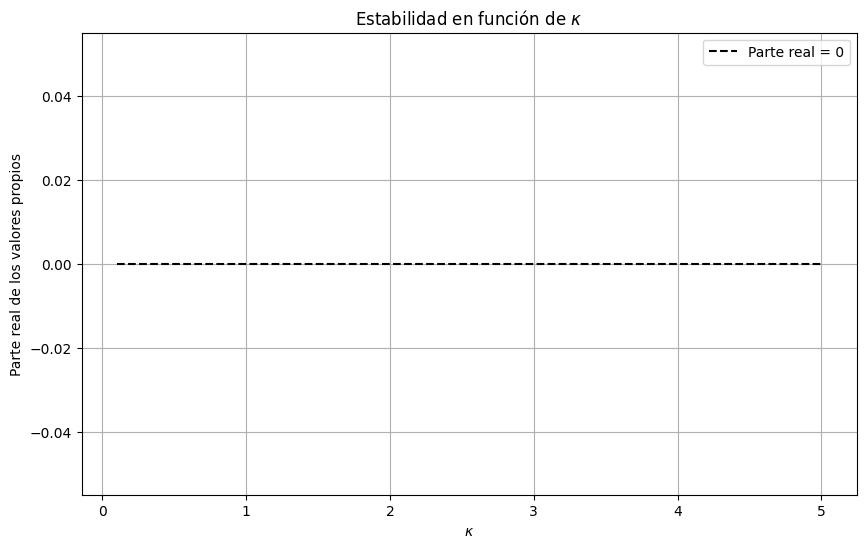

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parámetros
V0 = 220  # Velocidad de rotación (km/s)
r = 8     # Radio (kpc)
Omega = V0 / r
kappa = np.sqrt(2 * Omega)

# Condiciones iniciales
Sigma0 = 1.0    # Perturbación inicial
v0 = 0.0        # Velocidad inicial

# Sistema de ecuaciones
def dSdt(t, S, kappa):
    Sigma, v = S
    return [v, -kappa**2 * Sigma]

# Solución numérica
t_span = [0, 10]  # Tiempo en unidades apropiadas (ej: Gyr)
sol = solve_ivp(dSdt, t_span, [Sigma0, v0], args=(kappa,), dense_output=True)
t = np.linspace(t_span[0], t_span[1], 1000)
Sigma_num = sol.sol(t)[0]

# Solución analítica
A = Sigma0
B = v0 / kappa
Sigma_analitica = A * np.cos(kappa * t) + B * np.sin(kappa * t)

# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(t, Sigma_num, label='Solución numérica', linestyle='--')
plt.plot(t, Sigma_analitica, label='Solución analítica', alpha=0.7)
plt.xlabel('Tiempo')
plt.ylabel(r'$\Sigma(t)$')
plt.title('Evolución temporal de la perturbación en densidad superficial')
plt.legend()
plt.grid(True)
plt.show()

# Valores propios
A_matrix = np.array([[0, 1], [-kappa**2, 0]])
eigenvalues = np.linalg.eigvals(A_matrix)
print(f"Valores propios: {eigenvalues}")

# Análisis de estabilidad al variar κ
kappa_values = np.linspace(0.1, 5, 100)  # Rango de κ
real_parts = [np.real(np.linalg.eigvals([[0, 1], [-k**2, 0]])) for k in kappa_values]

plt.figure(figsize=(10, 6))
plt.plot(kappa_values, np.zeros_like(kappa_values), 'k--', label='Parte real = 0')
plt.xlabel(r'$\kappa$')
plt.ylabel('Parte real de los valores propios')
plt.title('Estabilidad en función de $\kappa$')
plt.grid(True)
plt.legend()
plt.show()